In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px  # For interactive plots
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
import scipy.stats as stats
%matplotlib inline


In [122]:
import pandas as pd

df = pd.read_csv("C:/Users/bvgpo/Desktop/IIIT_HYDERABAD/Sem2/DA/A1/M25_DA_A1_Dataset2.csv")  # Replace with actual filename
print(df.info())
print(df.describe())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12685 entries, 0 to 12684
Columns: 145 entries, ID to Pantry Type
dtypes: float64(12), int64(93), object(40)
memory usage: 14.0+ MB
None
                 ID  Units Available         Price  Maintenance Charges  \
count  12685.000000      6135.000000  1.260100e+04         6.283000e+03   
mean    6343.000000         7.751589  2.640261e+07         9.076812e+03   
std     3661.988417        26.335448  3.653648e+08         2.399983e+05   
min        1.000000         0.000000  1.000000e+05         0.000000e+00   
25%     3172.000000         0.000000  7.000000e+06         1.000000e+01   
50%     6343.000000         1.000000  1.350000e+07         2.500000e+03   
75%     9514.000000         5.000000  2.550000e+07         6.000000e+03   
max    12685.000000       750.000000  4.080000e+10         1.768000e+07   

       Booking Amount  Covered Area   sqft Price    Carpet Area      Bathroom  \
count    7.701000e+03  11374.000000  1.148000e+04  10133

C:\Users\bvgpo\AppData\Local\Temp\ipykernel_93924\4194455381.py:3: DtypeWarning: Columns (39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:/Users/bvgpo/Desktop/IIIT_HYDERABAD/Sem2/DA/A1/M25_DA_A1_Dataset2.csv")  # Replace with actual filename


In [123]:
print(df.columns.tolist())


['ID', 'Possession Status', 'Availability Starts From', 'Floor No', 'Commercial', 'Developer', 'Approved Authority Name', 'Units Available', 'Price', 'Price (English)', 'Flooring Type', 'Electricity Status', 'Maintenance Type', 'Maintenance Charges', 'Booking Amount', 'Landmark', 'Covered Area', 'Project Name', 'sqft Price ', 'Carpet Area', 'Area Name', 'Property Uniqueness', 'Unit of Carpet Area', 'Society', 'Ownership Type', 'furnished Type', 'Bathroom', 'Parking', 'Facing', 'Amenities Facing', 'Transaction Type', 'Floor Data', 'Type of Property', 'City', 'bedroom', 'Data Referred From', 'floors', 'Water Status', 'Luxury Flat', 'Covered Area.1', 'Carpet Area Unit', 'isPrimeLocationProperty', 'Tenants Preference', 'Location', 'Property', 'covArea Unit', 'isLuxuryServiceProvided', 'Property Lifespan', 'balconies', 'Rera', 'Power Back Up', 'Lift', 'Rain Water Harvesting', 'Club House', 'Swimming Pool', 'Gymnasium', 'Park', 'Parking.1', 'Security', 'Water Storage', 'Private Terrace/Garde

In [124]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [125]:
print(df.columns.tolist())

['id', 'possession_status', 'availability_starts_from', 'floor_no', 'commercial', 'developer', 'approved_authority_name', 'units_available', 'price', 'price_(english)', 'flooring_type', 'electricity_status', 'maintenance_type', 'maintenance_charges', 'booking_amount', 'landmark', 'covered_area', 'project_name', 'sqft_price', 'carpet_area', 'area_name', 'property_uniqueness', 'unit_of_carpet_area', 'society', 'ownership_type', 'furnished_type', 'bathroom', 'parking', 'facing', 'amenities_facing', 'transaction_type', 'floor_data', 'type_of_property', 'city', 'bedroom', 'data_referred_from', 'floors', 'water_status', 'luxury_flat', 'covered_area.1', 'carpet_area_unit', 'isprimelocationproperty', 'tenants_preference', 'location', 'property', 'covarea_unit', 'isluxuryserviceprovided', 'property_lifespan', 'balconies', 'rera', 'power_back_up', 'lift', 'rain_water_harvesting', 'club_house', 'swimming_pool', 'gymnasium', 'park', 'parking.1', 'security', 'water_storage', 'private_terrace/garden

In [118]:
# Reducing Redundant columns
df.drop(columns=['price','covered_area.1','carpet_area_unit','covarea_unit', 'parking.1','land_area_/_covered_area' ,'kids_play_area','floor_no','isluxuryserviceprovided','library'], inplace=True)

df.rename(columns={'price_(english)': 'price','unit_of_carpet_area':'unit_of_area'}, inplace=True)

In [126]:
print(df.columns.tolist())

['id', 'possession_status', 'availability_starts_from', 'floor_no', 'commercial', 'developer', 'approved_authority_name', 'units_available', 'price', 'price_(english)', 'flooring_type', 'electricity_status', 'maintenance_type', 'maintenance_charges', 'booking_amount', 'landmark', 'covered_area', 'project_name', 'sqft_price', 'carpet_area', 'area_name', 'property_uniqueness', 'unit_of_carpet_area', 'society', 'ownership_type', 'furnished_type', 'bathroom', 'parking', 'facing', 'amenities_facing', 'transaction_type', 'floor_data', 'type_of_property', 'city', 'bedroom', 'data_referred_from', 'floors', 'water_status', 'luxury_flat', 'covered_area.1', 'carpet_area_unit', 'isprimelocationproperty', 'tenants_preference', 'location', 'property', 'covarea_unit', 'isluxuryserviceprovided', 'property_lifespan', 'balconies', 'rera', 'power_back_up', 'lift', 'rain_water_harvesting', 'club_house', 'swimming_pool', 'gymnasium', 'park', 'parking.1', 'security', 'water_storage', 'private_terrace/garden

In [127]:
# grouping similar columns together

# Create a new binary column 'kids_amenities'
df['kids_amenities'] = df[['kidsplay_area', 'kids_play_pool_with_water_slides']].any(axis=1).astype(int)
df.drop(columns=['kidsplay_area', 'kids_play_pool_with_water_slides'], inplace=True)


#Merge club house into a sing category of basic vs premium club house and then delete the original columns
def classify_clubhouse(row):
    if row['large_clubhouse']:
        return 'premium'
    elif row['club_house']:
        return 'basic'
    else:
        return 'none'

df['clubhouse_type'] = df.apply(classify_clubhouse, axis=1)

df.drop(columns=['club_house', 'large_clubhouse'], inplace=True)


# Create a new binary column for food and beverage amenities and delete existing columns
df['food_and_beverage'] = df[['coffee_lounge_&_restaurants', 'bar/lounge', 'cafeteria/food_court']].any(axis=1).astype(int)
df.drop(columns=['coffee_lounge_&_restaurants', 'bar/lounge', 'cafeteria/food_court'], inplace=True)


# Create a new binary column for water-related amenities
df['water_facilities'] = df[['water_status', 'water_storage', 'rain_water_harvesting']].any(axis=1).astype(int)
df.drop(columns=['water_status', 'water_storage', 'rain_water_harvesting'], inplace=True)


In [128]:
print(df.columns.tolist())

['id', 'possession_status', 'availability_starts_from', 'floor_no', 'commercial', 'developer', 'approved_authority_name', 'units_available', 'price', 'price_(english)', 'flooring_type', 'electricity_status', 'maintenance_type', 'maintenance_charges', 'booking_amount', 'landmark', 'covered_area', 'project_name', 'sqft_price', 'carpet_area', 'area_name', 'property_uniqueness', 'unit_of_carpet_area', 'society', 'ownership_type', 'furnished_type', 'bathroom', 'parking', 'facing', 'amenities_facing', 'transaction_type', 'floor_data', 'type_of_property', 'city', 'bedroom', 'data_referred_from', 'floors', 'luxury_flat', 'covered_area.1', 'carpet_area_unit', 'isprimelocationproperty', 'tenants_preference', 'location', 'property', 'covarea_unit', 'isluxuryserviceprovided', 'property_lifespan', 'balconies', 'rera', 'power_back_up', 'lift', 'swimming_pool', 'gymnasium', 'park', 'parking.1', 'security', 'private_terrace/garden', 'vaastu_compliant', 'service/goods_lift', 'air_conditioned', 'visitor

In [131]:
#handling missing values
missing_summary = df.isnull().sum()
print(missing_summary[missing_summary > 0])



possession_status              78
availability_starts_from     9602
floor_no                      858
approved_authority_name      6542
units_available              6550
price                          84
flooring_type                4534
electricity_status           5425
maintenance_type             5613
maintenance_charges          6402
booking_amount               4984
landmark                     4644
covered_area                 1311
project_name                 4531
sqft_price                   1205
property_uniqueness          8025
unit_of_carpet_area          1307
ownership_type               3260
furnished_type                 77
bathroom                       69
parking                      6159
facing                       3569
amenities_facing             4099
floor_data                    858
floors                        866
covered_area.1               1311
carpet_area_unit             2607
location                      323
property                      323
covarea_unit  

In [8]:

#convert data types
df['availability_starts_from'] = pd.to_datetime(df['availability_starts_from'], errors='coerce')
df['price'] = pd.to_numeric(df['price'], errors='coerce')


In [10]:
#feature engineering

df['price_per_sqft'] = df['price'] / df['carpet_area']
df['is_ready'] = df['possession_status'].apply(lambda x: 1 if x == 'Ready' else 0)


In [132]:
#outlier detection

Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['price'] >= Q1 - 1.5 * IQR) & (df['price'] <= Q3 + 1.5 * IQR)]


In [133]:
#sanity check before eda
print(df.info())
print(df.describe())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 11324 entries, 0 to 12684
Columns: 139 entries, id to water_facilities
dtypes: float64(12), int32(3), int64(84), object(40)
memory usage: 12.0+ MB
None
                 id  units_available         price  maintenance_charges  \
count  11324.000000      5243.000000  1.132400e+04         5.372000e+03   
mean    6496.651095         8.230593  1.495036e+07         6.993627e+03   
std     3711.713958        27.477458  1.116586e+07         2.412770e+05   
min        1.000000         0.000000  1.000000e+05         0.000000e+00   
25%     3256.750000         0.000000  6.500000e+06         1.000000e+01   
50%     6781.500000         1.000000  1.200000e+07         2.360000e+03   
75%     9667.250000         5.000000  2.000000e+07         5.000000e+03   
max    12685.000000       750.000000  5.310000e+07         1.768000e+07   

       booking_amount  covered_area     sqft_price   carpet_area  \
count    6.658000e+03  10176.000000   10311.000000  11

In [16]:
df.to_csv('C:/Users/bvgpo/Desktop/IIIT_HYDERABAD/Sem2/DA/A1/cleaned_real_estate_data.csv', index=False)


In [17]:
#Exploratory Data Analysis Begins

# Structure and summary
df.info()
df.describe()
df.shape
df.columns


<class 'pandas.core.frame.DataFrame'>
Int64Index: 12685 entries, 0 to 12684
Columns: 147 entries, id to is_ready
dtypes: datetime64[ns](1), float64(13), int64(94), object(39)
memory usage: 14.3+ MB


Index(['id', 'possession_status', 'availability_starts_from', 'floor_no',
       'commercial', 'developer', 'approved_authority_name', 'units_available',
       'price', 'price_(english)',
       ...
       'cycling_&_jogging_track', 'fire_fighting_equipment',
       'aesthetically_designed_landscape_garden', 'possession_by', 'nri_pref',
       'land_area_/_covered_area', 'land_area_unit', 'pantry_type',
       'price_per_sqft', 'is_ready'],
      dtype='object', length=147)

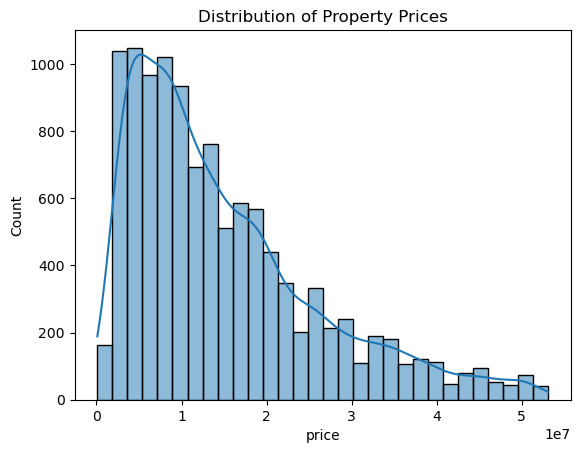

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for price
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribution of Property Prices')
plt.show()



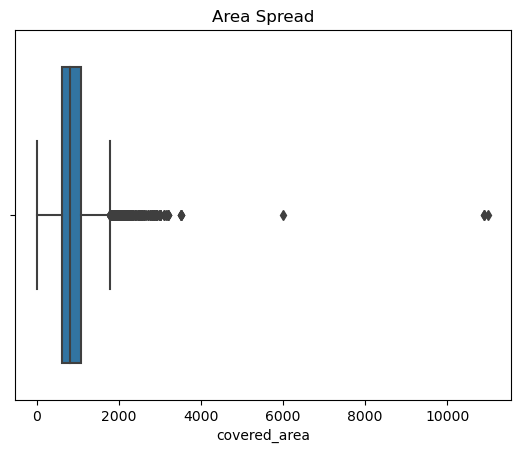

In [135]:
# Boxplot for area
sns.boxplot(x=df['covered_area'])
plt.title('Area Spread')
plt.show()


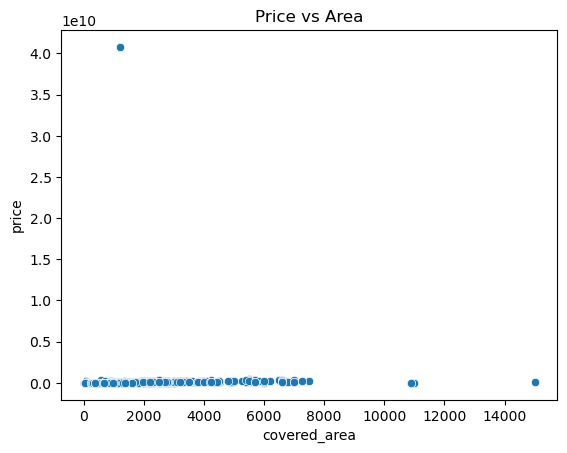

In [27]:
#Bivariate Analysis

sns.scatterplot(x='covered_area', y='price', data=df)
plt.title('Price vs Area')
plt.show()


In [26]:
# Average price by location
df.groupby('location')['price'].mean().sort_values(ascending=False).head(10)


location
Shivaji Park, Mumbai          1.341647e+09
Churchgate station, Mumbai    1.400000e+08
Marine Drive, Mumbai          1.199808e+08
Prabhadevi, Mumbai            1.045187e+08
Sundervan Complex, Mumbai     9.500000e+07
RTO Colony, Mumbai            9.385000e+07
Khar Danda, Mumbai            8.658333e+07
North Ave, Mumbai             8.375000e+07
Churchgate, Mumbai            8.266667e+07
Gulmohar Road, Mumbai         8.104800e+07
Name: price, dtype: float64

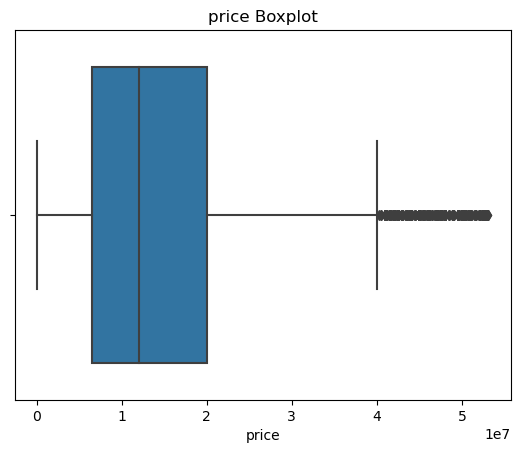

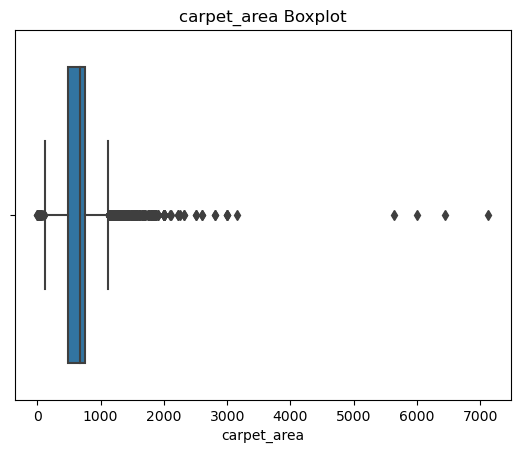

In [140]:
for col in ['price', 'carpet_area']:
    sns.boxplot(x=df[col])
    plt.title(f'{col} Boxplot')
    plt.show()


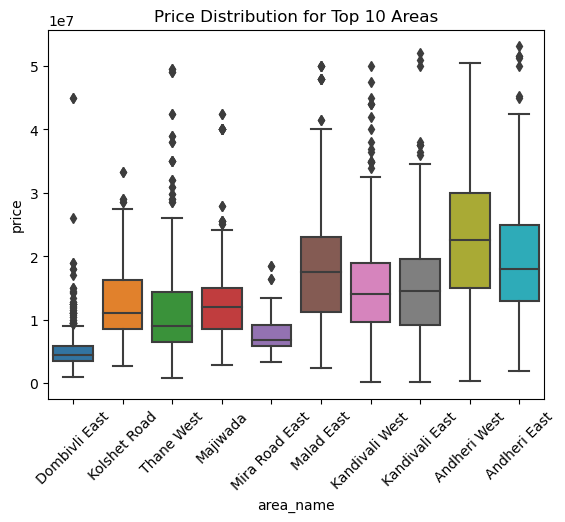

In [141]:
#price distribution of top 10 areas

top_areas = df['area_name'].value_counts().nlargest(10).index
filtered_df = df[df['area_name'].isin(top_areas)]

sns.boxplot(x='area_name', y='price', data=filtered_df)
plt.xticks(rotation=45)
plt.title('Price Distribution for Top 10 Areas')
plt.show()


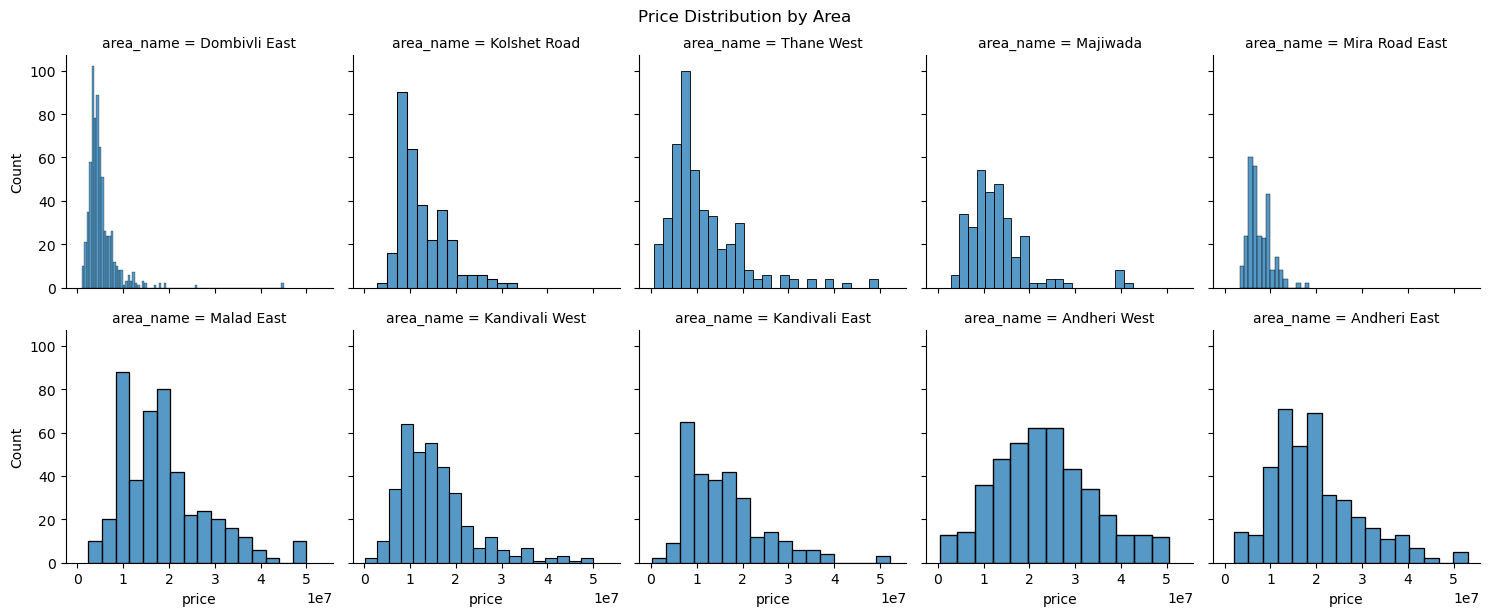

In [147]:
#price distribution area wise
g = sns.FacetGrid(filtered_df, col='area_name', col_wrap=5, height=3)
g.map(sns.histplot, 'price')
g.fig.suptitle('Price Distribution by Area', y=1.02)
plt.show()


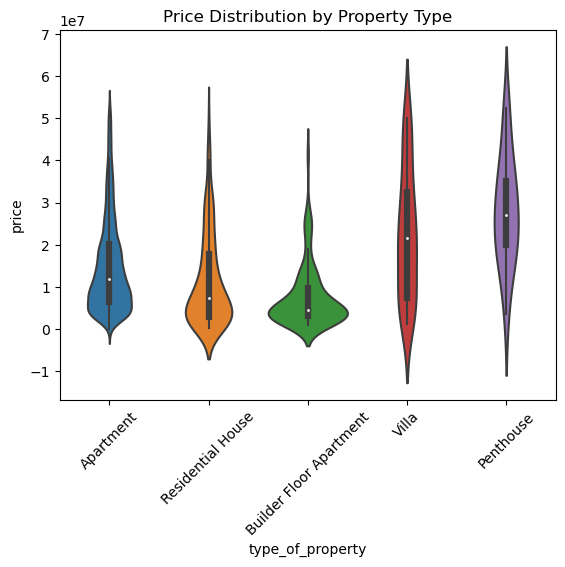

In [148]:
#violin plot by amenity type

sns.violinplot(x='type_of_property', y='price', data=df)
plt.xticks(rotation=45)
plt.title('Price Distribution by Property Type')
plt.show()


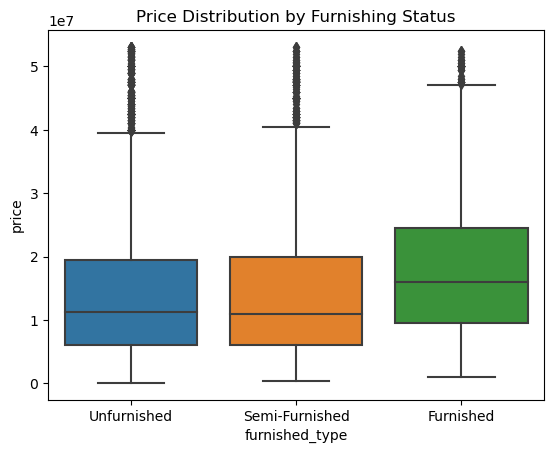

In [149]:
#price distribution by furnishing status
sns.boxplot(x='furnished_type', y='price', data=df)
plt.title('Price Distribution by Furnishing Status')
plt.show()


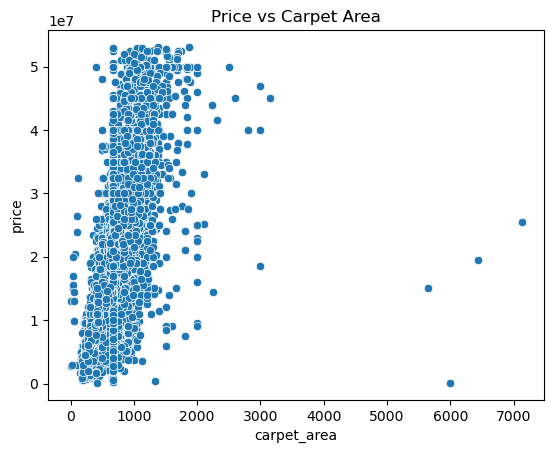

In [150]:
#carpetarea vs price

sns.scatterplot(x='carpet_area', y='price', data=df)
plt.title('Price vs Carpet Area')
plt.show()


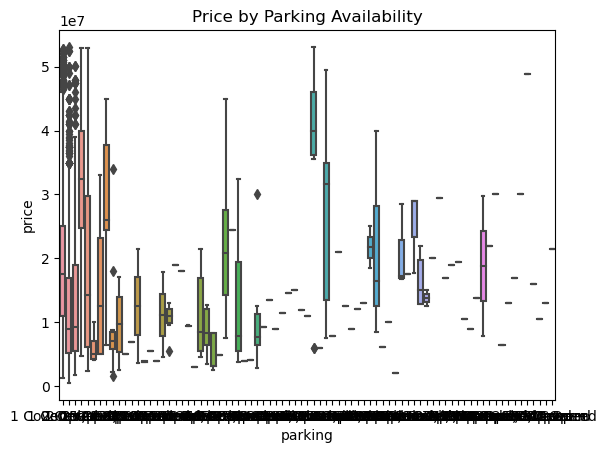

In [151]:
#parking availability with price

sns.boxplot(x='parking', y='price', data=df)
plt.title('Price by Parking Availability')
plt.show()


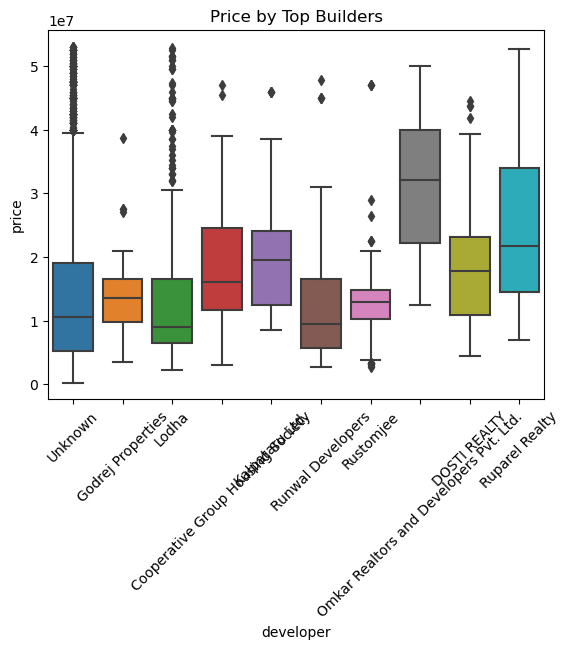

In [155]:
#Developer/builder aspects

top_builders = df['developer'].value_counts().nlargest(10).index
filtered_df = df[df['developer'].isin(top_builders)]

sns.boxplot(x='developer', y='price', data=filtered_df)
plt.xticks(rotation=45)
plt.title('Price by Top Builders')
plt.show()
